In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import R2Score

In [6]:
df = pd.read_csv('train.csv') #Manaully uploaded to google
df.columns = df.columns.str.lower()
df = df.drop('id', axis=1)
print(df.shape)
df.head()

(1117957, 21)


,monsoonintensity,topographydrainage,rivermanagement,deforestation,urbanization,climatechange,damsquality,siltation,agriculturalpractices,encroachments,...,drainagesystems,coastalvulnerability,landslides,watersheds,deterioratinginfrastructure,populationscore,wetlandloss,inadequateplanning,politicalfactors,floodprobability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [7]:
X = df.drop('floodprobability', axis=1)
y = df['floodprobability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=26)
#Note that I'm going back to a size of 25%... I want more data...
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [24]:
r2 = R2Score()

In [34]:
#And now it's go time!

#Gah, I'madding a lotof layers then taking a shower.

model = Sequential()
model.add(Input((X.shape[1],)))
# model.add(BatchNormalization())#Oh, forgot we could just do this in lieu of ss.Oh well
model.add(Dense(24, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(36, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(48, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(60, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(48, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(24, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=[r2])

In [35]:
#If running this might want to turn verbose to be off/0
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=0,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=256, verbose=1)

Epoch 1/20
3057/3057 [==============================] - 22s 6ms/step - loss: 0.0024 - r2_score: 0.2897 - val_loss: 5.7354e-04 - val_r2_score: 0.7799
Epoch 2/20
3057/3057 [==============================] - 19s 6ms/step - loss: 4.8276e-04 - r2_score: 0.8145 - val_loss: 6.2027e-04 - val_r2_score: 0.7619
Epoch 3/20
3057/3057 [==============================] - 21s 7ms/step - loss: 4.3496e-04 - r2_score: 0.8329 - val_loss: 6.0376e-04 - val_r2_score: 0.7683
Epoch 4/20
3057/3057 [==============================] - 19s 6ms/step - loss: 4.1709e-04 - r2_score: 0.8397 - val_loss: 6.1601e-04 - val_r2_score: 0.7636
Epoch 5/20
3057/3057 [==============================] - 21s 7ms/step - loss: 4.0909e-04 - r2_score: 0.8428 - val_loss: 5.6798e-04 - val_r2_score: 0.7820
Epoch 6/20
3057/3057 [==============================] - 19s 6ms/step - loss: 4.0513e-04 - r2_score: 0.8443 - val_loss: 5.8835e-04 - val_r2_score: 0.7742
Epoch 7/20
3057/3057 [==============================] - 22s 7ms/step - loss: 4.0194e-0

In [39]:
max(history.history['r2_score'])

0.8475971817970276

In [21]:
# pred_price = model.predict(X_test).flatten()

10481/10481 [==============================] - 21s 2ms/step


In [31]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

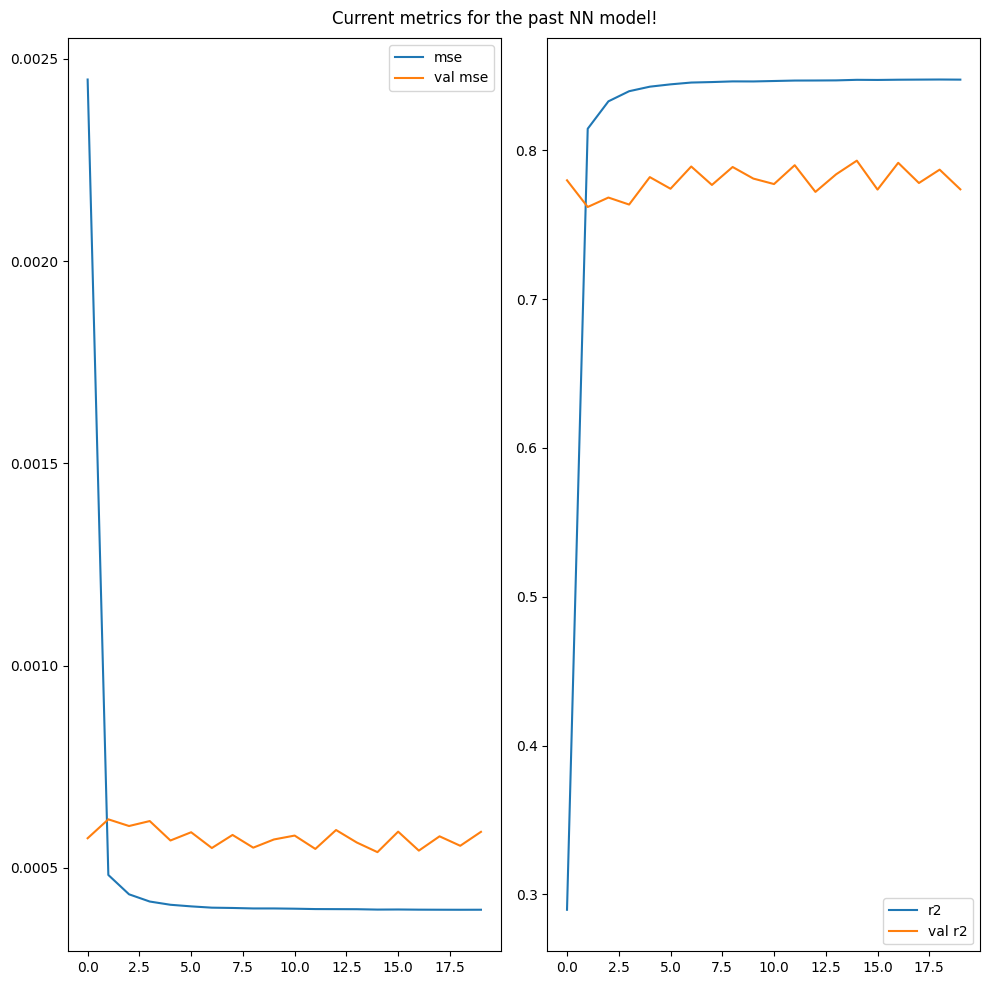

In [36]:
plt.figure(figsize=(10, 10))
plt.suptitle("Current metrics for the past NN model!")

ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], label='mse')
ax1.plot(history.history['val_loss'], label='val mse')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['r2_score'], label='r2')
ax2.plot(history.history['val_r2_score'], label='val r2')
ax2.legend()

plt.tight_layout();

With a final R2 (and this wasn't even counting validation) of 0.8475971817970276 this was more than lackluster. So, back to 'modeling_i' we return.